In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [4]:
#import the User Datasets
xls = pd.ExcelFile('Channel_Conversion.xlsx')
Organic_Search = pd.read_excel(xls, 'Organic')
Direct = pd.read_excel(xls, 'Direct')
Paid_Search = pd.read_excel(xls, 'Paid')

### We used only these Datasets because the other 3 had 2 or less conversions

In [5]:
#Remove the dates for ease
Organic_Search = Organic_Search['E-commerce Conversion Rate']
Direct = Direct['E-commerce Conversion Rate']
Paid_Search = Paid_Search['E-commerce Conversion Rate']

In [6]:
#convert datasets into arrays
Organic_Search = Organic_Search.values
Direct = Direct.values
Paid_Search = Paid_Search.values

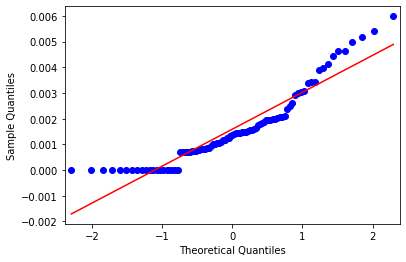

In [7]:
#plot both datasets using qqplot to check for normality
qqplot(Organic_Search, line='s')
pyplot.show()

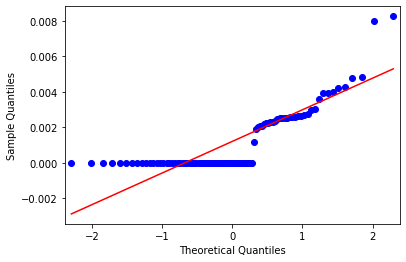

In [8]:
qqplot(Direct, line='s')
pyplot.show()

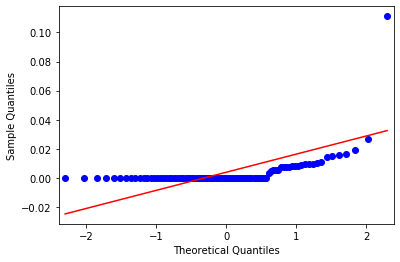

In [9]:
qqplot(Paid_Search, line='s')
pyplot.show()

### All datasets look not normal since they fall off the qq plot

In [10]:
names = ["Organic_Search", "Direct", "Paid_Search"]
for index, i in enumerate((Organic_Search, Direct, Paid_Search)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Organic_Search
Statistics=0.887, p=0.000
Sample does not look Gaussian (reject H0)
Direct
Statistics=0.703, p=0.000
Sample does not look Gaussian (reject H0)
Paid_Search
Statistics=0.313, p=0.000
Sample does not look Gaussian (reject H0)


### Since all datasets are not normaly distributed non-parametric tests should be used.

In [11]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution. 
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [12]:
stat, p = kruskal(Organic_Search, Direct, Paid_Search)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:    
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=14.850, p=0.001
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [13]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

### Organic against every other Channel

In [14]:
#Organic against every other Channel
names = ["Direct", "Paid_Search"]
for index, i in enumerate((Direct, Paid_Search)):
    stat, p = ranksums(Organic_Search,i)
    print('Organic_Search -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Organic_Search - Direct
Statistics=2.708, p=0.007
The difference between the two datasets is significant (reject H0)
Organic_Search - Paid_Search
Statistics=3.446, p=0.001
The difference between the two datasets is significant (reject H0)


### Direct against Paid

In [15]:
#Direct against Paid_Search
stat, p = ranksums(Direct,Paid_Search)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=0.134, p=0.894
The difference between the two datasets is not significant (fail to reject H0)
